In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#tantargycsoport szotar
cc={
    'magyar':'nyelvek',\
    u'német':'nyelvek',\
    u'román':'nyelvek',\
    u'angol':'nyelvek',\
    u'francia':'nyelvek',\
    'matematika':u'matek-info',\
    'informatika':u'matek-info',\
    'fizika':u'természettudományok',\
    u'kémia':u'természettudományok',\
    u'földrajz':u'természettudományok',\
    u'biológia':u'természettudományok',\
    u'csillagászat':u'természettudományok',\
    u'történelem':u'társadalomtudományok',\
    u'történelem ':u'társadalomtudományok',\
    u'róm. Kat vallás':u'társadalomtudományok',\
    u'szociológia':u'társadalomtudományok',\
    u'közgazdaság':u'társadalomtudományok',\
    u'filozófia':u'társadalomtudományok',\
    u'rajz':u'művészetek',\
    u'zene':u'művészetek',\
    u'vállalkozás':u'társadalomtudományok',\
    u'logika':u'társadalomtudományok',\
    u'pszichológia':u'társadalomtudományok',\
    u'lélektan':u'társadalomtudományok',\
    }

Versenyek

In [3]:
data={}
for i in pd.read_excel('eredmenyek.xlsx').fillna(0).T.iteritems():
    
    #tantargycsoport check
    if i[1][3] not in cc: print i[1][3]
    
    #evszam
    if i[1][0] not in data: data[i[1][0]]={}
    #evfolyam
    if i[1][2][:str.find(str(i[1][2]),'.')] not in data[i[1][0]]:data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]]={}
    #osztaly
    if i[1][2][str.find(str(i[1][2]),'.')+1:] not in data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]]:
        data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]][i[1][2][str.find(str(i[1][2]),'.')+1:]]={}
    #tantargycsoport
    if cc[i[1][3]] not in data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]][i[1][2][str.find(str(i[1][2]),'.')+1:]]:
        data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]][i[1][2][str.find(str(i[1][2]),'.')+1:]][cc[i[1][3]]]=[]
    
    data2={}
    data2['nev']=i[1][1]
    data2['tantargy']=i[1][3]
    data2['szint']=i[1][4]
    data2['hely']=i[1][5]
    data2['megjegyzes']=i[1][6]
    
    data[i[1][0]][i[1][2][:str.find(str(i[1][2]),'.')]][i[1][2][str.find(str(i[1][2]),'.')+1:]][cc[i[1][3]]].append(data2)

In [204]:
#adatok mentese
import json
file('data.json','w').write(json.dumps(data))

Osztalyzatok

Adattisztogatas - nincs szukseg OCR-ra

In [4]:
data2={}
import re
printer=False
#adatok beolvasas, online excel fajlok helye: http://blog.csaladen.es/marci/
#ezek mar uto-formazottak, eredetiek hely http://mag.ro/file.php?Zj0zMDc=
for y in range(2002,2011):
    if y not in {2005}:
        year=repr(y)
        df=pd.read_excel(year+'.xlsx')
        data2[year]={}
        for i in df.index[:]:
            #ha nem ures sor
            if df.loc[i].dropna().count()>0:
                if df.loc[i].dropna()[0].__class__ != int:
                    if u'OSZTÁLY:' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][8:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2]
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2]
                        if printer: print y,ev,osztaly,0
                    if u'oszTáLy:' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][8:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2].capitalize()
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2].capitalize()
                        if printer: print y,ev,osztaly,1
                    if u'OSZTÁLY ' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][0:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2]
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2]
                        if printer: print y,ev,osztaly,2
                    if u'OSZTÁLY' not in df.loc[i].dropna()[0]: 
                        if u'OSYTÁLY' not in df.loc[i].dropna()[0]: 
                            if u'oszTáLy' not in df.loc[i].dropna()[0]: 
                                if ev not in data2[year]:data2[year][ev]={}
                                if osztaly not in data2[year][ev]:data2[year][ev][osztaly]=[[],[],[]]

                                #oszlop szerinti olvasas nev/media/helyseg
                                if df.loc[i].dropna().count()==3:
                                    data2[year][ev][osztaly][0].append(df.loc[i].dropna()[0].strip())
                                    data2[year][ev][osztaly][1].append(df.loc[i].dropna()[1])
                                    data2[year][ev][osztaly][2].append(df.loc[i].dropna()[2].strip())

                                #korrekcio ha a fenti befuccsol
                                elif df.loc[i].dropna().count()==1:
                                    #ha legalabb egy szam
                                    if re.search("\d", df.loc[i].dropna()[0]):
                                        a=re.search("\d", df.loc[i].dropna()[0]).start()
                                        data2[year][ev][osztaly][0].append(df.loc[i].dropna()[0][:a].strip())
                                        data2[year][ev][osztaly][1].append(df.loc[i].dropna()[0][a:].replace(" ", "")[:4])
                                        data2[year][ev][osztaly][2].append(df.loc[i].dropna()[0][a:].replace(" ", "")[4:].strip())
                                        
                                elif df.loc[i].dropna().count()==2:
                                    try:
                                        b=df.loc[i].dropna()[0]+df.loc[i].dropna()[1]
                                        if re.search("\d", b):
                                            a=re.search("\d", b).start()
                                            data2[year][ev][osztaly][0].append(b[:a].strip())
                                            data2[year][ev][osztaly][1].append(b[a:].replace(" ", "")[:4])
                                            data2[year][ev][osztaly][2].append(b[a:].replace(" ", "")[4:].strip())
                                        
                                    except:
                                        print 'error', df.loc[i].dropna()[0]
                                        raise SyntaxError

OCR - karaterfelismeres

In [5]:
printer=False
#adatok evkonyvekbol, fenykepek->pdf->OCR->excel
for y in range(2011,2015):
        year=repr(y)
        df=pd.read_excel(year+'.xlsx')
        data2[year]={}
        for i in df.index[:]:
            #ha nem ures sor
            if df.loc[i].dropna().count()>0:
                if df.loc[i].dropna()[0].__class__ != int:
                    if u'OSZTÁLY:' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][8:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2]
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2]
                        if printer: print y,ev,osztaly,0
                    if u'oszTáLy:' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][8:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2].capitalize()
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2].capitalize()
                        if printer: print y,ev,osztaly,1
                    if u'OSZTÁLY ' in df.loc[i].dropna()[0]: 
                        a=df.loc[i].dropna()[0][0:].replace(" ", "")
                        try: ev=a[:str.find(str(a[:4]),'.')]
                        except: ev=a[:str.find(str(a[:3]),'.')]
                        try: osztaly=a[str.find(str(a[:4]),'.')+1:str.find(str(a[:4]),'.')+2]
                        except: osztaly=a[str.find(str(a[:3]),'.')+1:str.find(str(a[:3]),'.')+2]
                        if printer: print y,ev,osztaly,2
                    if u'OSZTÁLY' not in df.loc[i].dropna()[0]: 
                        if u'OSYTÁLY' not in df.loc[i].dropna()[0]: 
                            if u'oszTáLy' not in df.loc[i].dropna()[0]: 
                                if ev not in data2[year]:data2[year][ev]={}
                                if osztaly not in data2[year][ev]:data2[year][ev][osztaly]=[[],[],[]]

                                #oszlop szerinti olvasas nev/media/helyseg
                                if df.loc[i].dropna().count()==3:
                                    data2[year][ev][osztaly][0].append(df.loc[i].dropna()[0].strip())
                                    data2[year][ev][osztaly][1].append(df.loc[i].dropna()[1])
                                    data2[year][ev][osztaly][2].append(df.loc[i].dropna()[2].strip())

                                #korrekcio ha a fenti befuccsol
                                elif df.loc[i].dropna().count()==1:
                                    #ha legalabb egy szam
                                    if re.search("\d", df.loc[i].dropna()[0]):
                                        a=re.search("\d", df.loc[i].dropna()[0]).start()
                                        data2[year][ev][osztaly][0].append(df.loc[i].dropna()[0][:a].strip())
                                        data2[year][ev][osztaly][1].append(df.loc[i].dropna()[0][a:].replace(" ", "")[:4])
                                        data2[year][ev][osztaly][2].append(df.loc[i].dropna()[0][a:].replace(" ", "")[4:].strip())
                                        
                                elif df.loc[i].dropna().count()==2:
                                    try:
                                        b=df.loc[i].dropna()[0]+df.loc[i].dropna()[1]
                                        if re.search("\d", b):
                                            a=re.search("\d", b).start()
                                            data2[year][ev][osztaly][0].append(b[:a].strip())
                                            data2[year][ev][osztaly][1].append(b[a:].replace(" ", "")[:4])
                                            data2[year][ev][osztaly][2].append(b[a:].replace(" ", "")[4:].strip())
                                        
                                    except:
                                        print 'error', df.loc[i].dropna()[0]
                                        raise SyntaxError

In [6]:
#mediak listava alakitasa, normalizalas
for year in data2:
    for ev in data2[year]:
        for osztaly in data2[year][ev]:
            try: 
                data2[year][ev][osztaly][1]=\
                 list(np.array([i.replace(" ", "").replace(",", "") for i in data2[year][ev][osztaly][1]]).astype(float))
            except:pass
            
            for i in range(len(data2[year][ev][osztaly][1])):
                try:
                    if data2[year][ev][osztaly][1][i].__class__==unicode:
                        if data2[year][ev][osztaly][1][i]==u'ism\xe9tl\xf5':
                            data2[year][ev][osztaly][1][i]=4
                        if data2[year][ev][osztaly][1][i]==u'ism\xe9tl\u0151':
                            data2[year][ev][osztaly][1][i]=4
                        if data2[year][ev][osztaly][1][i]==u'oszt\xe1lyism\xe9tl\u0151':
                            data2[year][ev][osztaly][1][i]=4
                        if data2[year][ev][osztaly][1][i]==u'eltan\xe1csolt':
                            data2[year][ev][osztaly][1][i]=0
                        if data2[year][ev][osztaly][1][i]==u'\xe1t\xedratkozott':
                            data2[year][ev][osztaly][1][i]=0
                        if data2[year][ev][osztaly][1][i]==u'elment':
                            data2[year][ev][osztaly][1][i]=0
                        if data2[year][ev][osztaly][1][i]==u'elment ':
                            data2[year][ev][osztaly][1][i]=0
                        if re.search("\d", data2[year][ev][osztaly][1][i]):
                            data2[year][ev][osztaly][1][i]=int(data2[year][ev][osztaly][1][i].replace(",", "").replace(" ", ""))
                except:pass
                try:
                    if data2[year][ev][osztaly][1][i]>101:
                        data2[year][ev][osztaly][1][i]/=100.0

                    elif data2[year][ev][osztaly][1][i]>11:
                        data2[year][ev][osztaly][1][i]/=10.0
                except:pass   

In [7]:
for y in range(2002,2015):
    if y not in {2005}:
        print y,data2[repr(y)].keys()

2002 [u'IX', u'XI', u'XII', u'X']
2003 [u'IX', u'XI', u'XII', u'X']
2004 [u'IX', u'XI', u'XII', u'X']
2006 [u'IX', u'XI', u'XII', u'X']
2007 [u'IX', u'XI', u'XII', u'X']
2008 [u'IX', u'XI', u'XII', u'X']
2009 [u'IX', u'XI', u'XII', u'X']
2010 [u'IX', u'XI', u'XII', u'X']
2011 [u'IX', u'XI', u'XII', u'X']
2012 [u'IX', u'XI', u'XII', u'X']
2013 [u'IX', u'XI', u'XII', u'X']
2014 [u'IX', u'XI', u'XII', u'X']


In [8]:
for year in data2:
    for ev in data2[year]:
        for osztaly in data2[year][ev]:
            if len(data2[year][ev][osztaly][0])<10:
                #problemasak
                print year,ev,osztaly,len(data2[year][ev][osztaly][0])

In [9]:
year='2009'
ev='IX'
osztaly='A'
print len(data2[year][ev][osztaly][0]),len(data2[year][ev][osztaly][1]),len(data2[year][ev][osztaly][2])
data2[year][ev][osztaly]

29 29 29


[[u'Andr\xe1s \ufffd\ufffd\u0151ke',
  u'Andr\xe1s Alp\xe1r',
  u'Antal Zsolt R\xf3bert',
  u'B\xedr\xf3 Brigitta',
  u'Both Anita',
  u'Dragu Erika',
  u'Ferencz Ad\xe9l',
  u'Ferencz Hunor',
  u'F\xfcl\xf6p Zsolt',
  u'F\xfcl\xf6p Erika',
  u'Gidr\xf3 Szid\xf3nia',
  u'Gy\xf6rgy Zsuzsanna',
  u'Ho\ufffdpoth Ren\xe1ta M\xe1ria',
  u'I\ufffdets Vill\u0151',
  u'Imre T\xfcnde',
  u'Imre Hunor',
  u'Incze Katalin',
  u'Kelemen Kinga',
  u'L\u0151rinczy Ta\ufffd\xe1s',
  u'M\xe1rton B\xedborka Bernadette',
  u'Moln\xe1r Ad\xe9l',
  u'Moln\xe1r Andrea',
  u'Portik Szende',
  u'S\xe1ndor Szilveszter',
  u'Szilveszter Szid\xf3nia',
  u'Tank\xf3 T\xedmea',
  u'Vaszi Henrietta',
  u'Vaszi M\xe1ria',
  u'Veress T\xedmea'],
 [9.18,
  8.15,
  8.71,
  9.05,
  8.86,
  8.92,
  8.86,
  9.6,
  9.05,
  8.31,
  8.47,
  8.86,
  9.36,
  8.55,
  8.94,
  8.47,
  9.07,
  8.97,
  8.44,
  8.36,
  9.1,
  9.23,
  9.23,
  8.52,
  8.81,
  8.57,
  8.63,
  8.78,
  8.92],
 [u'Cs\xedkszentsi\ufffdon',
  u'Cs\xedkszere

Statisztika gyujtes

In [10]:
ar=np.array(data2[year][ev][osztaly][1])
temp = ar.argsort()[::-1]
ranks = np.empty(len(ar), int)
ranks[temp] = np.arange(len(ar))

In [11]:
ranks

array([ 4, 28, 18,  7, 14, 12, 15,  0,  8, 27, 23, 13,  1, 21, 10, 24,  6,
        9, 25, 26,  5,  3,  2, 22, 16, 20, 19, 17, 11])

In [12]:
ar

array([ 9.18,  8.15,  8.71,  9.05,  8.86,  8.92,  8.86,  9.6 ,  9.05,
        8.31,  8.47,  8.86,  9.36,  8.55,  8.94,  8.47,  9.07,  8.97,
        8.44,  8.36,  9.1 ,  9.23,  9.23,  8.52,  8.81,  8.57,  8.63,
        8.78,  8.92])

In [13]:
data3={}
data_ev={}
data_ossz={}
for year in data2:
    data3[year]={}
    data_ev[year]={}
    
    for ev in data2[year]:
        data3[year][ev]={}
        arr=[[],[],[],[],[]]
        for osztaly in data2[year][ev]:
            for k in range(3):
                arr[k]+=data2[year][ev][osztaly][k]
            arr[3]+=[osztaly for i in range(len(data2[year][ev][osztaly][0]))]
            
            if osztaly not in data_ev[year]:data_ev[year][osztaly]=[]
            data_ev[year][osztaly]+=data2[year][ev][osztaly][1]
            if osztaly not in data_ossz:data_ossz[osztaly]=[]
            data_ossz[osztaly]+=data2[year][ev][osztaly][1]                
        
        #iskola sorrend felallitasa
        ar=np.array(arr[1])
        temp = ar.argsort()[::-1]
        ranks = np.empty(len(ar), int)
        ranks[temp] = np.arange(len(ar))
        
        for i in range(len(ranks)):
            if ranks[i]<10:
                data3[year][ev][repr(ranks[i])]=[arr[0][i],arr[1][i],arr[2][i],arr[3][i]]

In [262]:
#adatok mentese
import json
file('data3.json','w').write(json.dumps(data3))

Osztalyzatok plot

In [14]:
#0, 4-esek csereje nan-ra
for year in data2:
    for ev in data2[year]:
        for osztaly in data2[year][ev]:
            for i in data2[year][ev][osztaly][1]:
                if i in {0,4}:
                    data2[year][ev][osztaly][1][i]=np.nan
#ujrafuttatas
ar=np.array(data2[year][ev][osztaly][1])
temp = ar.argsort()[::-1]
ranks = np.empty(len(ar), int)
ranks[temp] = np.arange(len(ar))
data3={}
data_ev={}
data_ossz={}
for year in data2:
    data3[year]={}
    data_ev[year]={}
    
    for ev in data2[year]:
        data3[year][ev]={}
        arr=[[],[],[],[],[]]
        for osztaly in data2[year][ev]:
            for k in range(3):
                arr[k]+=data2[year][ev][osztaly][k]
            arr[3]+=[osztaly for i in range(len(data2[year][ev][osztaly][0]))]
            
            if osztaly not in data_ev[year]:data_ev[year][osztaly]=[]
            data_ev[year][osztaly]+=data2[year][ev][osztaly][1]
            if osztaly not in data_ossz:data_ossz[osztaly]=[]
            data_ossz[osztaly]+=data2[year][ev][osztaly][1]                
        
        #iskola sorrend felallitasa
        ar=np.array(arr[1])
        temp = ar.argsort()[::-1]
        ranks = np.empty(len(ar), int)
        ranks[temp] = np.arange(len(ar))
        
        for i in range(len(ranks)):
            if ranks[i]<10:
                data3[year][ev][repr(ranks[i])]=[arr[0][i],arr[1][i],arr[2][i],arr[3][i]]

In [15]:
np.mean(data_ossz['D'])

nan

In [16]:
np.nanmean(data_ev['2002']['A'])

8.6621428571428574

In [17]:
import random
import matplotlib as mpl
import matplotlib.font_manager as font_manager
path = 'Righteous-Regular.ttf'
prop = font_manager.FontProperties(fname=path)

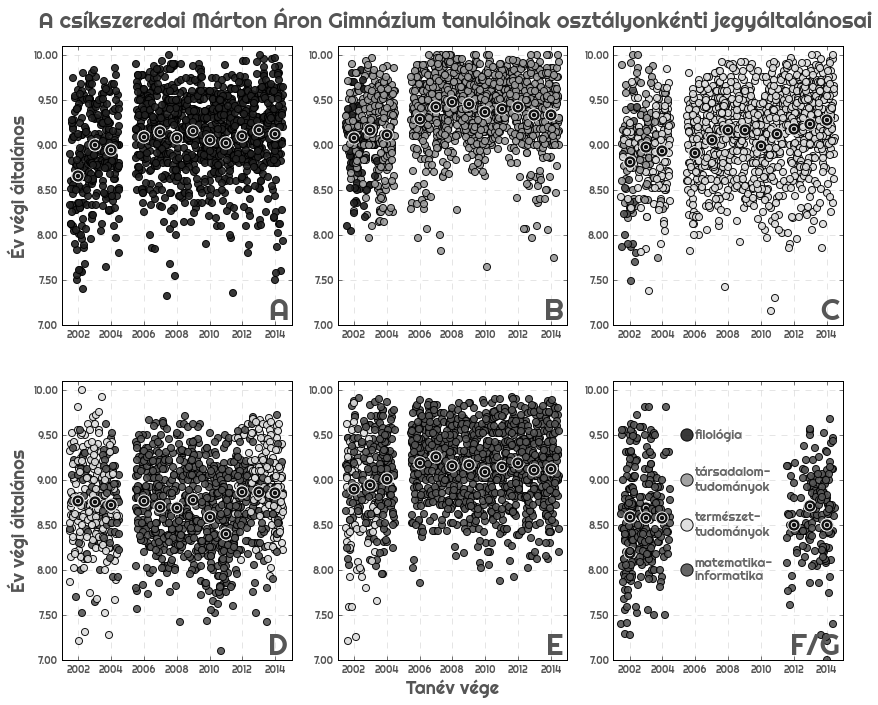

In [95]:
cc={"A":0,"A ":0,"B":1,"C":2,"D":3,"E":4,"e":4,"F":5,"G":5}
osztalyok="ABCDEFG"
dd={"9":9,"10":10,"11":11,"12":12,"IX":9,"X":10,"XI":11,"XII":12}
ee=[u"filológia",u"társadalom-\ntudományok",u"természet-\ntudományok",u"matematika-\ninformatika"]
colors=colors2=["#222222","#999999","#dddddd","#555555","#555555","#555555"]
mpl.rc('font', family='Trebuchet MS')
fig, ax = plt.subplots(2,3,subplot_kw=dict(axisbg='#ffffff'),figsize=(14,11))
for i in range(6):
    ax[i/3][i%3].grid(color='#cccccc', linestyle='--')
    ax[i/3][i%3].set_xlim(2001,2015)
    ax[i/3][i%3].set_ylim(7,10.1)
    ax[i/3][i%3].set_axisbelow(True)
    ax[i/3][i%3].set_xticklabels([2000,2002,2004,2006,2008,2010,2012,2014],fontproperties=prop,color="#555555")
    ax[i/3][i%3].set_yticklabels(["7.00","7.50","8.00","8.50","9.00","9.50","10.00"],fontproperties=prop,color="#555555")
ax[1][1].set_xlabel(u"Tanév vége",fontproperties=prop,size=18,color="#555555")
ax[0][0].set_ylabel(u"Év végi általános",fontproperties=prop,size=18,color="#555555")
ax[1][0].set_ylabel(u"Év végi általános",fontproperties=prop,size=18,color="#555555")
ma=[[] for i in range(6)]
for yr in range(2002,2015):
    if yr not in {2005}:
        year=repr(yr)
        for ev in data2[year]:
            for osztaly in data2[year][ev]:
                y=data2[year][ev][osztaly][1]
                ind=cc[osztaly]
                ind2=cc[osztaly]
                #osztalyprofilok javitasa: pl. a D osztaly neha bioszkemia, neha matekinfo
                if yr==2002:
                    if dd[ev]==9:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                        if osztaly=="E": ind2=2
                    if dd[ev]==12:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=3
                        if osztaly=="E": ind2=2
                if yr==2003:
                    if dd[ev]==10:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="D": ind2=2
                    if dd[ev]==12:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                        if osztaly=="E": ind2=2
                if yr==2004:
                    if dd[ev]==11:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==12:
                        if osztaly=="D": ind2=2
                if yr==2005:
                    if dd[ev]==12:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                if yr==2012:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                if yr==2013:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                if yr==2014:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="D": ind2=2
                x=[yr-0.5+random.random() for i in range(len(y))]
                ax[ind/3][ind%3].scatter(x,y,50,c=colors[ind2],alpha=0.9)
                ax[ind/3][ind%3].scatter(yr,np.nanmean(data_ev[year][osztaly]),150,c="#111111",alpha=1,edgecolor="#eeeeee")
                ax[ind/3][ind%3].scatter(yr,np.nanmean(data_ev[year][osztaly]),30,c="#111111",alpha=1,edgecolor="#eeeeee")
                #ax[ind/3][ind%3].scatter(yr,np.nanmean(data_ev[year][osztaly]),10,c="#111111",alpha=1,edgecolor="#eeeeee")
                    
for ind in range(5):
    ax[ind/3][ind%3].text(0.98,0,osztalyok[ind],color="#555555",size=30, fontproperties=prop, \
          horizontalalignment='right',verticalalignment='bottom',transform=ax[ind/3][ind%3].transAxes)
ax[1][2].text(0.98,0,"F/G",color="#555555",size=30, fontproperties=prop,\
    horizontalalignment='right',verticalalignment='bottom',transform=ax[1][2].transAxes)
for i in range(4):
    ax[1][2].scatter(2005.5,9.5-i*0.5,150,c=colors[i],alpha=0.9)
    ax[1][2].text(2006,9.5-i*0.5,ee[i],color="#555555",size=13, fontproperties=prop,\
        horizontalalignment='left',verticalalignment='center',alpha=0.9)
plt.suptitle(u'     A csíkszeredai Márton Áron Gimnázium tanulóinak osztályonkénti jegyáltalánosai',fontproperties=prop,\
             y=0.95,color="#555555",size=22)
plt.savefig('jegyff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
plt.show()

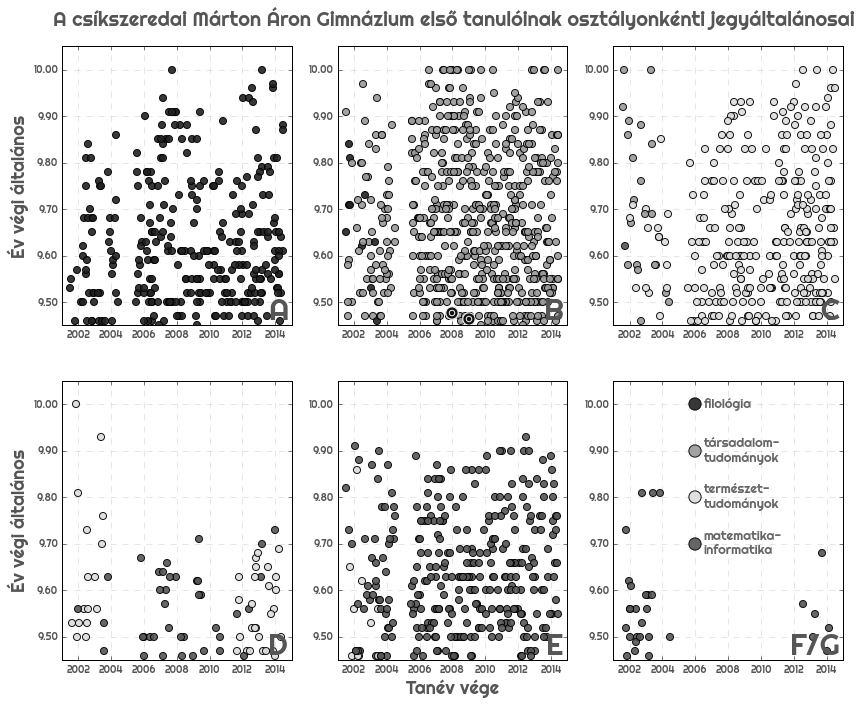

In [96]:
cc={"A":0,"A ":0,"B":1,"C":2,"D":3,"E":4,"e":4,"F":5,"G":5}
osztalyok="ABCDEFG"
dd={"9":9,"10":10,"11":11,"12":12,"IX":9,"X":10,"XI":11,"XII":12}
ee=[u"filológia",u"társadalom-\ntudományok",u"természet-\ntudományok",u"matematika-\ninformatika"]
mpl.rc('font', family='Trebuchet MS')
fig, ax = plt.subplots(2,3,subplot_kw=dict(axisbg='#ffffff'),figsize=(14,11))
for i in range(6):
    ax[i/3][i%3].grid(color='#cccccc', linestyle='--')
    ax[i/3][i%3].set_xlim(2001,2015)
    ax[i/3][i%3].set_ylim(9.45,10.05)
    ax[i/3][i%3].set_axisbelow(True)
    ax[i/3][i%3].set_xticklabels([2000,2002,2004,2006,2008,2010,2012,2014],fontproperties=prop,color="#555555")
    ax[i/3][i%3].set_yticklabels(["9.40","9.50","9.60","9.70","9.80","9.90","10.00"],fontproperties=prop,color="#555555")
ax[1][1].set_xlabel(u"Tanév vége",fontproperties=prop,size=18,color="#555555")
ax[0][0].set_ylabel(u"Év végi általános",fontproperties=prop,size=18,color="#555555")
ax[1][0].set_ylabel(u"Év végi általános",fontproperties=prop,size=18,color="#555555")
ma=[[] for i in range(6)]
for yr in range(2002,2015):
    if yr not in {2005}:
        year=repr(yr)
        for ev in data2[year]:
            for osztaly in data2[year][ev]:
                y=data2[year][ev][osztaly][1]
                ind=cc[osztaly]
                ind2=cc[osztaly]
                #osztalyprofilok javitasa: pl. a D osztaly neha bioszkemia, neha matekinfo
                if yr==2002:
                    if dd[ev]==9:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                        if osztaly=="E": ind2=2
                    if dd[ev]==12:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=3
                        if osztaly=="E": ind2=2
                if yr==2003:
                    if dd[ev]==10:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="D": ind2=2
                    if dd[ev]==12:
                        if osztaly=="B": ind2=0
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                        if osztaly=="E": ind2=2
                if yr==2004:
                    if dd[ev]==11:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                    if dd[ev]==12:
                        if osztaly=="D": ind2=2
                if yr==2005:
                    if dd[ev]==12:
                        if osztaly=="C": ind2=1
                        if osztaly=="D": ind2=2
                if yr==2012:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                if yr==2013:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                if yr==2014:
                    if dd[ev]==9:
                        if osztaly=="D": ind2=2
                    if dd[ev]==10:
                        if osztaly=="D": ind2=2
                    if dd[ev]==11:
                        if osztaly=="D": ind2=2
                x=[yr-0.5+random.random() for i in range(len(y))]
                ax[ind/3][ind%3].scatter(x,y,50,c=colors[ind2],alpha=0.9)
                ax[ind/3][ind%3].scatter(yr,np.nanmean(data_ev[year][osztaly]),150,c="#111111",alpha=1,edgecolor="#eeeeee")
                ax[ind/3][ind%3].scatter(yr,np.nanmean(data_ev[year][osztaly]),30,c="#111111",alpha=1,edgecolor="#eeeeee")
                    
for ind in range(5):
    ax[ind/3][ind%3].text(0.98,0,osztalyok[ind],color="#555555",size=30, fontproperties=prop, \
          horizontalalignment='right',verticalalignment='bottom',transform=ax[ind/3][ind%3].transAxes)
ax[1][2].text(0.98,0,"F/G",color="#555555",size=30, fontproperties=prop,\
    horizontalalignment='right',verticalalignment='bottom',transform=ax[1][2].transAxes)
for i in range(4):
    ax[1][2].scatter(2006,10-i*0.1,150,c=colors[i],alpha=0.9)
    ax[1][2].text(2006.5,10-i*0.1,ee[i],color="#555555",size=13, fontproperties=prop,\
        horizontalalignment='left',verticalalignment='center',alpha=0.9)
plt.suptitle(u'     A csíkszeredai Márton Áron Gimnázium első tanulóinak osztályonkénti jegyáltalánosai',\
             y=0.95,color="#555555",fontproperties=prop,size=20)
plt.savefig('topjegyff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
plt.show()

In [40]:
ff={u"nyelvek":0,u"társadalomtudományok":1,u"matek-info":2,u"természettudományok":3,u"művészetek":4};
hh={"0":1,"1":4,"2":3,"3":2,"u'D'":1,"4":1};
kk={"9":"IX","10":"X","X":"X","11":"XI","12":"XII"}
rr={u"országos":3,u"régió":2,u"helyi":1,u"helyi ":1};
data4=[0,0,0,0,0,0]
data5=[0,0,0,0,0]
data4b=[0,0,0,0,0,0]
data5b=[0,0,0,0,0]
data6=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
data7=[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
data6b=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
data7b=[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
data8={}
data8b={}
letszam={}
data9={}
data10={}
#letszam
for yr in range(2002,2015):
    if yr not in {2005}:
        year=repr(int(yr))
        if year not in letszam: letszam[year]={}
        for ev in data2[year]:
            for osztaly in data2[year][ev]:
                if year not in {2005}:
                    if cc[osztaly] not in letszam[year]:letszam[year][cc[osztaly]]=0
                    letszam[year][cc[osztaly]]+=len(data2[year][ev][osztaly.strip().capitalize()][0])
#komparativ statisztika
for year in data:
    if year not in data8: data8[year]=[0,0,0,0,0,0]
    if year not in data8b: data8b[year]=[0,0,0,0,0,0]
    for ev in data[year]:
        for osztaly in data[year][ev]:
            for tan in data[year][ev][osztaly]:
                data4[cc[osztaly]]+=len(data[year][ev][osztaly][tan])
                data8[year][cc[osztaly]]+=len(data[year][ev][osztaly][tan])
                data5[ff[tan]]+=len(data[year][ev][osztaly][tan])
                data6[cc[osztaly]][ff[tan]]+=len(data[year][ev][osztaly][tan])
                data7[ff[tan]][cc[osztaly]]+=len(data[year][ev][osztaly][tan])
                for k in data[year][ev][osztaly][tan]:
                    data4b[cc[osztaly]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    data8b[year][cc[osztaly]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    data5b[ff[tan]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    data6b[cc[osztaly]][ff[tan]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    data7b[ff[tan]][cc[osztaly]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    if k["nev"] not in data9: data9[k["nev"]]=0
                    data9[k["nev"]]+=1
                    if k["nev"] not in data10: data10[k["nev"]]=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]
                    else: data10[k["nev"]]+=hh[repr(k["hely"])]*\
                                                    rr[k["szint"]]

In [41]:
letszam

{'2002': {0: 99, 1: 106, 2: 99, 3: 93, 4: 100, 5: 129},
 '2003': {0: 101, 1: 108, 2: 105, 3: 95, 4: 104, 5: 104},
 '2004': {0: 109, 1: 117, 2: 108, 3: 99, 4: 112, 5: 52},
 '2006': {0: 116, 1: 118, 2: 109, 3: 110, 4: 116},
 '2007': {0: 110, 1: 118, 2: 108, 3: 101, 4: 109},
 '2008': {0: 107, 1: 114, 2: 108, 3: 95, 4: 105},
 '2009': {0: 113, 1: 116, 2: 111, 3: 102, 4: 108},
 '2010': {0: 116, 1: 116, 2: 112, 3: 107, 4: 110},
 '2011': {0: 118, 1: 120, 2: 113, 3: 114, 4: 113},
 '2012': {0: 120, 1: 118, 2: 121, 3: 101, 4: 119, 5: 29},
 '2013': {0: 118, 1: 118, 2: 121, 3: 108, 4: 119, 5: 55},
 '2014': {0: 116, 1: 125, 2: 121, 3: 118, 4: 121, 5: 83}}

In [42]:
data8

{2002L: [2, 10, 7, 11, 15, 3],
 2003L: [12, 15, 11, 8, 23, 7],
 2004L: [7, 13, 9, 3, 37, 0],
 2005L: [1, 16, 12, 5, 28, 0],
 2006L: [3, 16, 7, 4, 36, 0],
 2007L: [2, 17, 7, 9, 26, 0],
 2008L: [4, 22, 7, 4, 22, 0],
 2009L: [9, 13, 5, 1, 22, 0],
 2010L: [4, 16, 19, 3, 40, 0],
 2011L: [5, 19, 23, 1, 40, 0],
 2012L: [8, 13, 11, 2, 39, 0],
 2013L: [9, 7, 23, 3, 61, 0],
 2014L: [2, 16, 23, 2, 85, 1],
 2015L: [4, 11, 10, 1, 34, 3]}

In [43]:
percapita={}
percapitab={}
for yr in range(2002,2015):
    if yr not in {2005}:
        year=repr(yr)
        for osztaly in letszam[year]:
            if osztaly not in percapita:percapita[osztaly]=[]
            if osztaly not in percapitab:percapitab[osztaly]=[]
            percapita[osztaly].append(data8[int(year)][osztaly]*1.0/letszam[year][osztaly])
            percapitab[osztaly].append(data8b[int(year)][osztaly]*1.0/letszam[year][osztaly])
            if yr==2004:
                if osztaly!=5:
                    percapita[osztaly].append((data8[2004][osztaly]*1.0/letszam['2004'][osztaly]+\
                                          data8[2006][osztaly]*1.0/letszam['2006'][osztaly])/2)
                    percapitab[osztaly].append((data8b[2004][osztaly]*1.0/letszam['2004'][osztaly]+\
                                          data8b[2006][osztaly]*1.0/letszam['2006'][osztaly])/2)
                else:
                    percapita[osztaly].append(data8[2004][osztaly]*1.0/letszam['2004'][osztaly])
                    percapitab[osztaly].append(data8b[2004][osztaly]*1.0/letszam['2004'][osztaly])

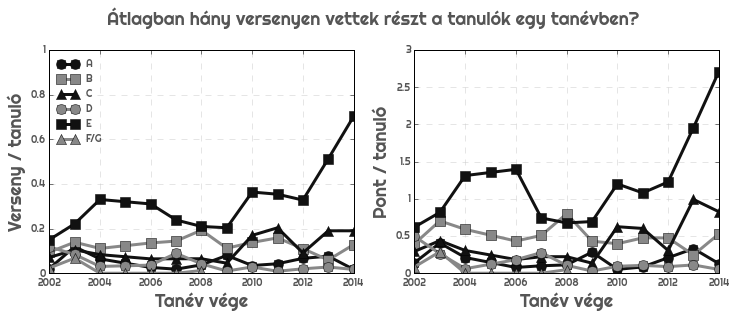

In [67]:
lbl=["A","B","C","D","E","F/G"]
ls=["o","s","^","o","s","^"]
lc=["#111111","#888888","#111111","#888888","#111111","#888888"]
fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#ffffff'),figsize=(12,4))
for i in range(2):
    ax[i].grid(color='#cccccc', linestyle='--')
    ax[i].set_xlim(0,12)
    ax[i].set_axisbelow(True)
    ax[i].set_xticklabels([2002,2004,2006,2008,2010,2012,2014],fontproperties=prop,color="#555555")
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,3)
ax[0].set_yticklabels(["0","0.2","0.4","0.6","0.8","1"],fontproperties=prop,color="#555555")
ax[1].set_yticklabels(["0","0.5","1","1.5","2","2.5","3"],fontproperties=prop,color="#555555")
ax[0].set_xlabel(u"Tanév vége",fontproperties=prop,size=18,color="#555555")
ax[1].set_xlabel(u"Tanév vége",fontproperties=prop,size=18,color="#555555")
ax[0].set_ylabel(u"Verseny / tanuló",fontproperties=prop,size=18,color="#555555")
ax[1].set_ylabel(u"Pont / tanuló",fontproperties=prop,size=18,color="#555555")
plt.suptitle(u"Átlagban hány versenyen vettek részt a tanulók egy tanévben?",fontproperties=prop,size=18,color="#555555",y=1.05)
for osztaly in percapita:
    ax[0].plot(percapita[osztaly],color=lc[osztaly],marker=ls[osztaly],alpha=1,label=lbl[osztaly],linewidth=3,markersize=10)
    ax[1].plot(percapitab[osztaly],color=lc[osztaly],marker=ls[osztaly],alpha=1,linewidth=3,markersize=10)
l=ax[0].legend(loc=2,framealpha=0,prop=prop)
for text in l.get_texts():
    text.set_color("#555555")
plt.savefig('percapitaff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
plt.show()

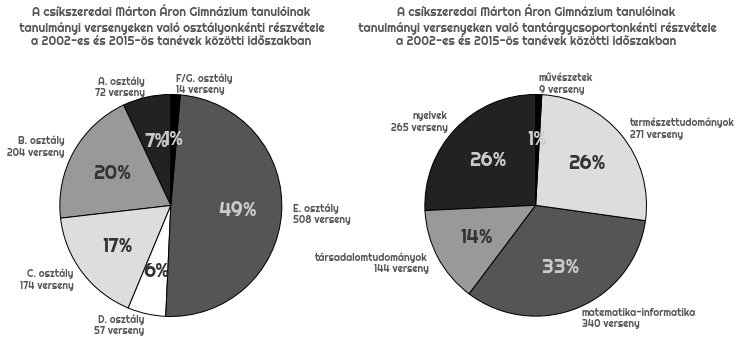

In [105]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#ffffff'),figsize=(12,4))
lbl=["A","B","C","D","E","F/G"]
hc=["*","*","*","*","*","*"]
lc=["#222222","#999999","#dddddd","#ffffff","#555555","#000000"]
patches, texts, autotexts=ax[0].pie(data4, labels=[lbl[i]+u'. osztály\n'+str(data4[i])+" verseny" for i in range(len(data4))], autopct='%1.0f%%',\
                       startangle=90, colors=lc)
#for p in range(len(patches)):
#    patches[p].set_hatch(hc[p])
    
ax[0].axis('equal')
ax[0].set_title(u'A csíkszeredai Márton Áron Gimnázium tanulóinak\n tanulmányi versenyeken való osztályonkénti részvétele\na 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.2,fontproperties=prop,size=12,color="#555555")
for i in range(len(texts)):
    texts[i].set_fontproperties(prop)
    texts[i].set_fontsize(10)
    texts[i].set_color("#555555")
    autotexts[i].set_fontproperties(prop)
    autotexts[i].set_fontsize(20)
    if i not in [1,2,3]: c="#cccccc"
    else: c="#333333"
    autotexts[i].set_color(c)
    
lbl2=[u"nyelvek",u"társadalomtudományok",u"matematika-informatika",u"természettudományok",u"művészetek"]
lc2=["#222222","#999999","#555555","#dddddd","#000000"]
patches, texts, autotexts=ax[1].pie(data5, labels=[lbl2[i]+u'\n'+str(data5[i])+" verseny" for i in range(len(data5))], autopct='%1.0f%%',\
                       startangle=90, colors=lc2)
ax[1].axis('equal')
ax[1].set_title(u'A csíkszeredai Márton Áron Gimnázium tanulóinak\n tanulmányi versenyeken való tantárgycsoportonkénti részvétele\na 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.2,fontproperties=prop,size=12,color="#555555")
for i in range(len(texts)):
    texts[i].set_fontproperties(prop)
    texts[i].set_fontsize(10)
    texts[i].set_color("#555555")
    autotexts[i].set_fontproperties(prop)
    autotexts[i].set_fontsize(20)
    if i not in [1,3]: c="#cccccc"
    else: c="#333333"
    autotexts[i].set_color(c)
    
plt.savefig('pie1osszff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
    
plt.show()

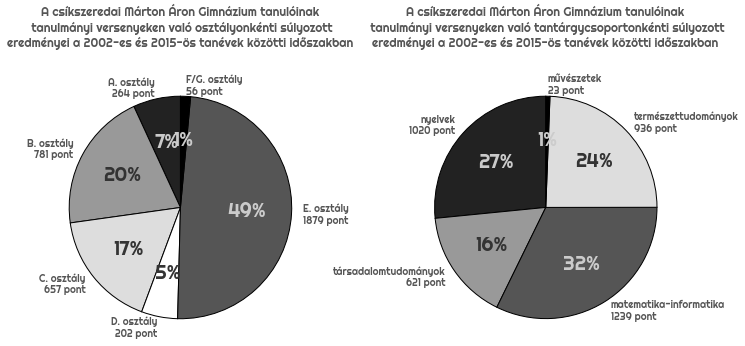

In [108]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#ffffff'),figsize=(12,4))
lbl=["A","B","C","D","E","F/G"] 
patches, texts, autotexts=ax[0].pie(data4b, labels=[lbl[i]+u'. osztály\n'+str(data4b[i])+" pont" for i in range(len(data4b))], autopct='%1.0f%%',\
                       startangle=90, colors=lc)
ax[0].axis('equal')
ax[0].set_title(u'A csíkszeredai Márton Áron Gimnázium tanulóinak\n tanulmányi versenyeken való osztályonkénti súlyozott \neredményei a 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.2,fontproperties=prop,size=12,color="#555555")
for i in range(len(texts)):
    texts[i].set_fontproperties(prop)
    texts[i].set_fontsize(10)
    texts[i].set_color("#555555")
    autotexts[i].set_fontproperties(prop)
    autotexts[i].set_fontsize(20)
    if i not in [1,2,3]: c="#cccccc"
    else: c="#333333"
    autotexts[i].set_color(c)
    
lbl2=[u"nyelvek",u"társadalomtudományok",u"matematika-informatika",u"természettudományok",u"művészetek"]
patches, texts, autotexts=ax[1].pie(data5b, labels=[lbl2[i]+u'\n'+str(data5b[i])+" pont" for i in range(len(data5b))], autopct='%1.0f%%',\
                       startangle=90, colors=lc2)
ax[1].axis('equal')
ax[1].set_title(u'A csíkszeredai Márton Áron Gimnázium tanulóinak\n tanulmányi versenyeken való tantárgycsoportonkénti súlyozott \neredményei a 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.2,fontproperties=prop,size=12,color="#555555")
for i in range(len(texts)):
    texts[i].set_fontproperties(prop)
    texts[i].set_fontsize(10)
    texts[i].set_color("#555555")
    autotexts[i].set_fontproperties(prop)
    autotexts[i].set_fontsize(20)
    if i not in [1,3]: c="#cccccc"
    else: c="#333333"
    autotexts[i].set_color(c)
    
plt.savefig('pie2osszff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
    
plt.show()

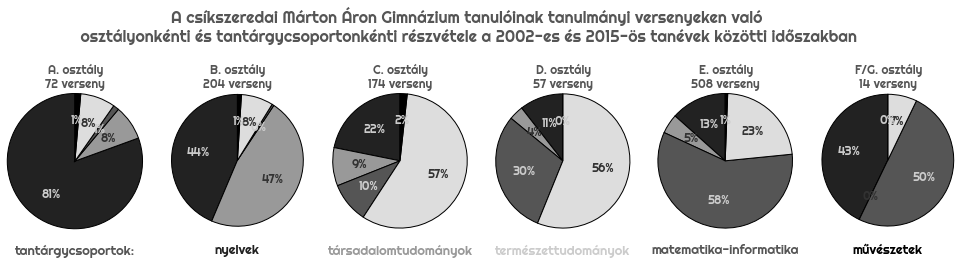

In [129]:
fig,axi=plt.subplots(1,6,figsize=(17,4))
lbl=["A","B","C","D","E","F/G"]
lbl2=[u"nyelvek",u"társadalomtudományok",u"matematika-informatika",u"természettudományok",u"művészetek"]
lbl4=[u"tantárgycsoportok:",u"nyelvek",u"társadalomtudományok",u"természettudományok",u"matematika-informatika",u"művészetek"]
lc2=["#222222","#999999","#cccccc","#555555","#000000"]
lc22=["#222222","#999999","#555555","#dddddd","#000000"]
colors4=['#555555']+lc2
for i in range(len(lbl)):
    d=data6[i]
    ax=axi[i]
    patches, texts, autotexts=ax.pie(d, autopct='%1.0f%%',\
                           startangle=90, colors=lc22)
    ax.axis('equal')
    ax.set_title(lbl[i]+u'. osztály\n'+str(np.array(d).sum())+" verseny",\
              y=0.81,fontproperties=prop,size=12,color="#555555")
    if (i<6):
        ax.text(0.5+i*0,0.1,lbl4[i],color=colors4[i],size=13, fontproperties=prop,\
            horizontalalignment='center',verticalalignment='center',alpha=1,transform=ax.transAxes)
    for j in range(len(texts)):
        autotexts[j].set_fontproperties(prop)
        autotexts[j].set_fontsize(12)
        if j in [0,2,4]: c="#cccccc"
        else: c="#333333"
        autotexts[j].set_color(c)

plt.suptitle(u'A csíkszeredai Márton Áron Gimnázium tanulóinak tanulmányi versenyeken való\n osztályonkénti és tantárgycsoportonkénti részvétele a 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.05,fontproperties=prop,size=16,color="#555555")
plt.savefig('pie3ff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
    
plt.show()

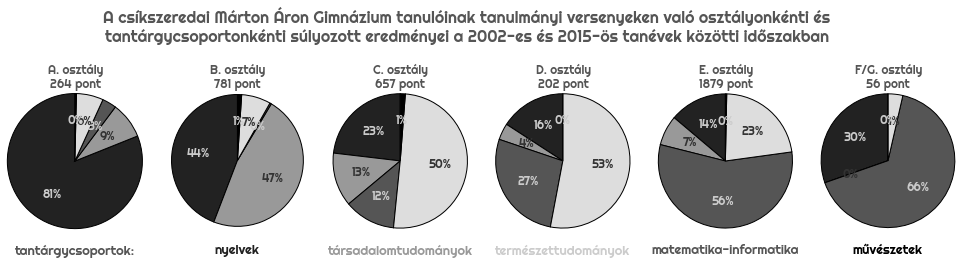

In [131]:
fig,axi=plt.subplots(1,6,figsize=(17,4))
lbl=["A","B","C","D","E","F/G"]
lbl2=[u"nyelvek",u"társadalomtudományok",u"matematika-informatika",u"természettudományok",u"művészetek"]
lbl4=[u"tantárgycsoportok:",u"nyelvek",u"társadalomtudományok",u"természettudományok",u"matematika-informatika",u"művészetek"]
lc2=["#222222","#999999","#cccccc","#555555","#000000"]
lc22=["#222222","#999999","#555555","#dddddd","#000000"]
colors4=['#555555']+lc2
for i in range(len(lbl)):
    d=data6b[i]
    ax=axi[i]
    patches, texts, autotexts=ax.pie(d, autopct='%1.0f%%',\
                           startangle=90, colors=lc22)
    ax.axis('equal')
    ax.set_title(lbl[i]+u'. osztály\n'+str(np.array(d).sum())+" pont",\
              y=0.81,fontproperties=prop,size=12,color="#555555")
    if (i<6):
        ax.text(0.5+i*0,0.1,lbl4[i],color=colors4[i],size=13, fontproperties=prop,\
            horizontalalignment='center',verticalalignment='center',alpha=1,transform=ax.transAxes)
    for j in range(len(texts)):
        autotexts[j].set_fontproperties(prop)
        autotexts[j].set_fontsize(12)
        if j in [0,2,4]: c="#cccccc"
        else: c="#333333"
        autotexts[j].set_color(c)

plt.suptitle(u'A csíkszeredai Márton Áron Gimnázium tanulóinak tanulmányi versenyeken való osztályonkénti és \ntantárgycsoportonkénti súlyozott eredményei a 2002-es és 2015-ös tanévek közötti időszakban',\
          y=1.05,fontproperties=prop,size=16,color="#555555")
plt.savefig('pie3bff.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150,facecolor="#ffffff", edgecolor='#888888')
    
plt.show()

In [498]:
data6

[[58, 6, 1, 6, 1],
 [89, 96, 1, 16, 2],
 [38, 16, 17, 100, 3],
 [6, 2, 17, 32, 0],
 [68, 24, 297, 116, 3],
 [6, 0, 7, 1, 0]]

In [499]:
data7

[[58, 89, 38, 6, 68, 6],
 [6, 96, 16, 2, 24, 0],
 [1, 1, 17, 17, 297, 7],
 [6, 16, 100, 32, 116, 1],
 [1, 2, 3, 0, 3, 0]]